In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
import lasio

Reading Data

            DEPT  LITHOLOGY_GEOLINK      DCAL       CALI    BS  MUDWEIGHT   
0      1003.0967                NaN       NaN        NaN  17.5        NaN  \
1      1003.2481                NaN       NaN        NaN  17.5        NaN   
2      1003.2491                NaN -5.044760  12.455240  17.5        NaN   
3      1003.4005                NaN -5.044760  12.455240  17.5        NaN   
4      1003.4015                NaN -5.044571  12.455429  17.5        NaN   
...          ...                ...       ...        ...   ...        ...   
17130  2374.9985                NaN  0.174811   8.674808   8.5       1.26   
17131  2375.1499                NaN  0.174811   8.674808   8.5       1.26   
17132  2375.1509                NaN       NaN        NaN   8.5       1.26   
17133  2383.6842                NaN       NaN        NaN   8.5        NaN   
17134  2383.6852                NaN       NaN        NaN   8.5        NaN   

        DRHO      THOR  NPHI    RHOB     PEF          GR      URAN  DTC   


<Axes: >

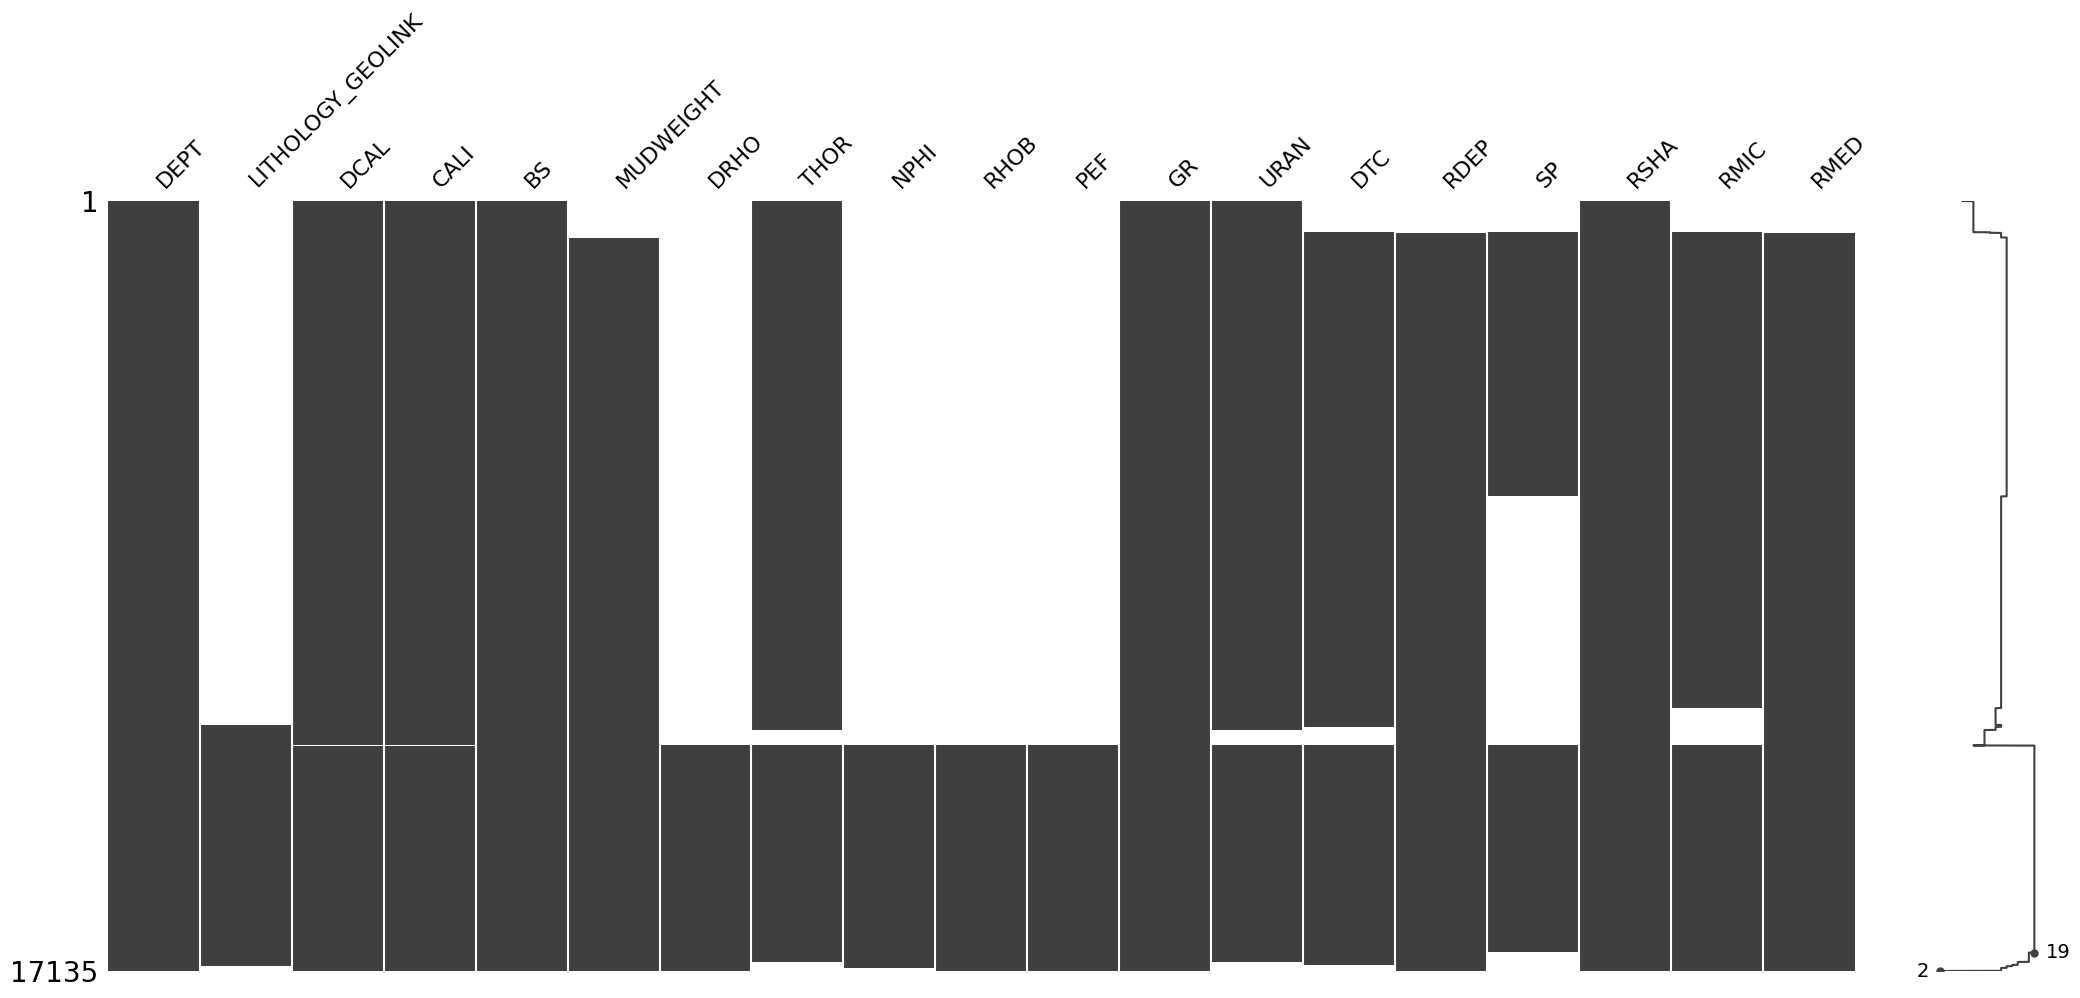

In [21]:
las = lasio.read("C:/Users/Firza Rizaldi/OneDrive/Documents/FISBAT/SIAPA YANG JADI LITHOLOGI/25_8-7.las") 
dataframe = las.df() 
dataframe = dataframe.reset_index() 
print(dataframe) 
msno.matrix(dataframe)

Data Cleaning

<Axes: >

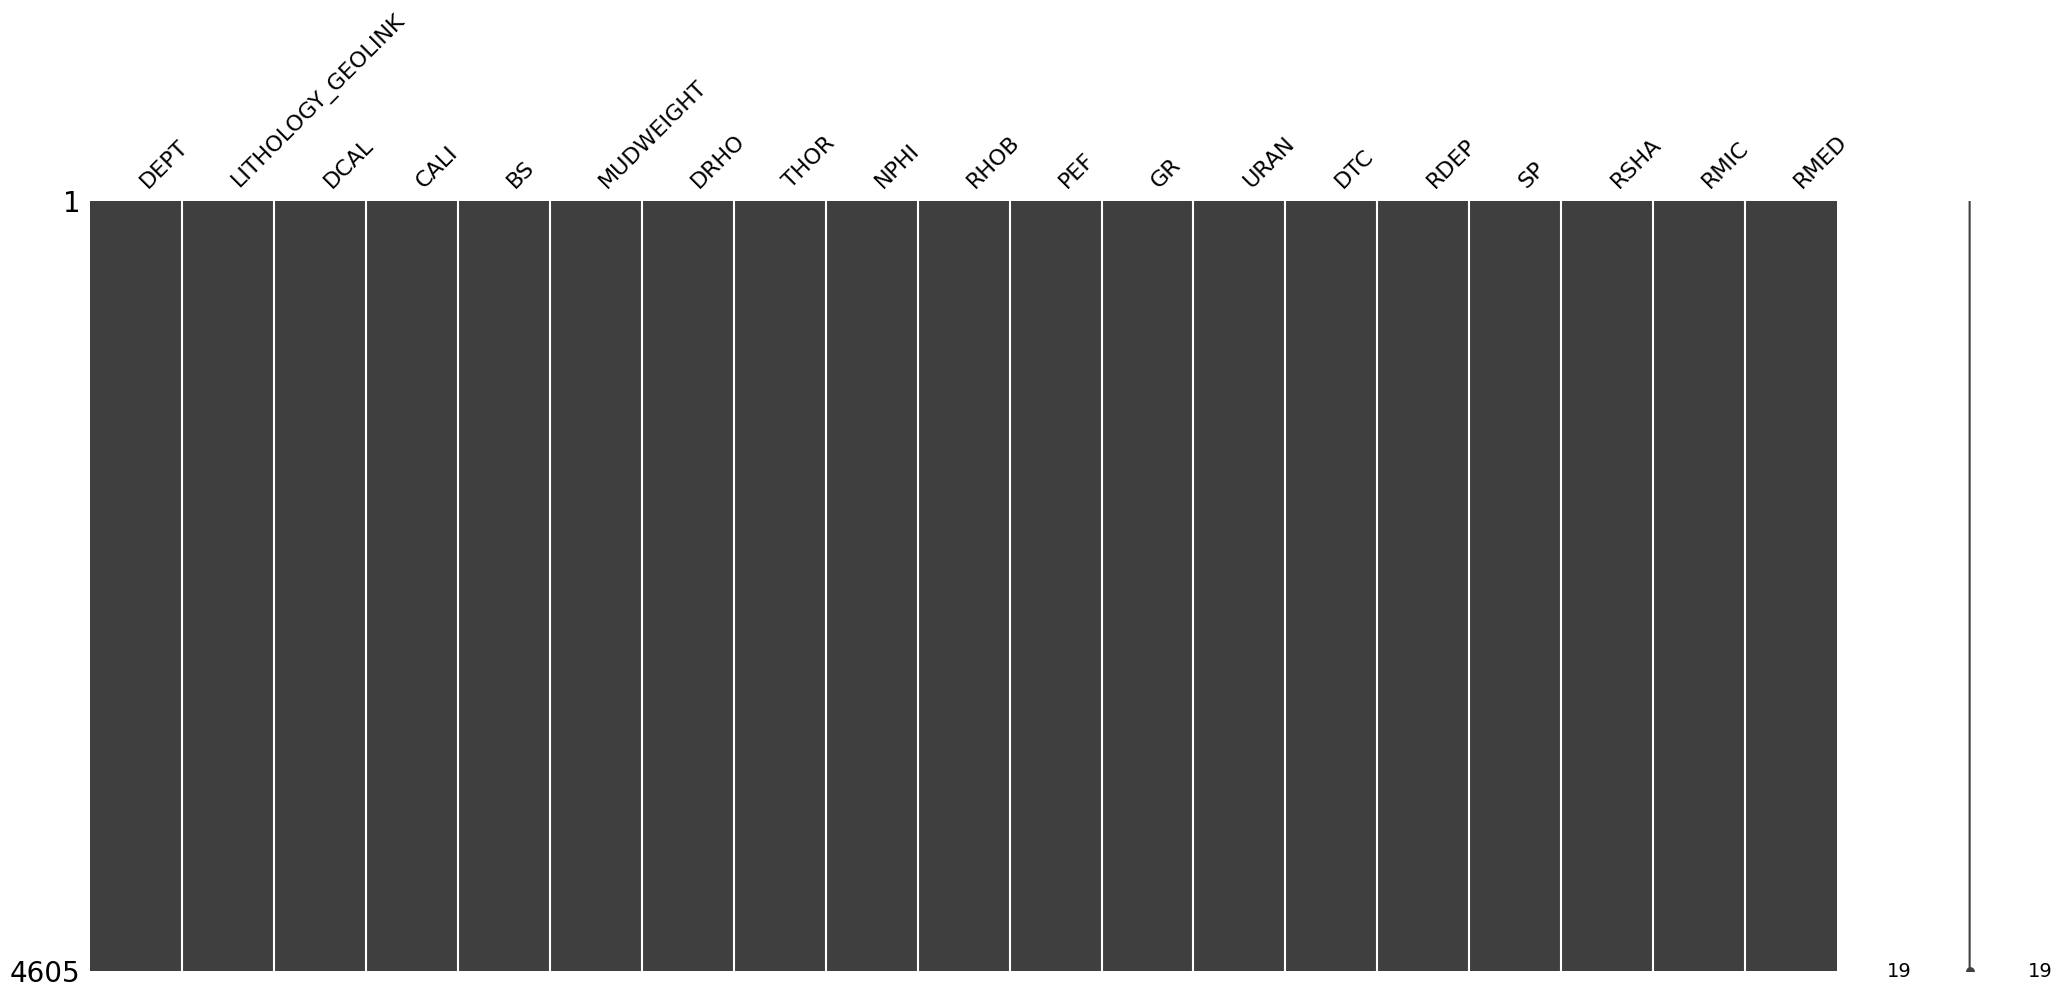

In [22]:
dataframe_DropNaN = dataframe.dropna() 
msno.matrix(dataframe_DropNaN)

memisahkan data outlier dan inlier setelah data cleaning

In [23]:
from sklearn.ensemble import IsolationForest 
anomaly_inputs = ['DEPT', 'RHOB',  'NPHI', 'GR', 'DTC', 'RDEP'] 
model = IsolationForest(contamination=0.2, random_state=42, n_estimators=100) 
model.fit(dataframe_DropNaN[anomaly_inputs])

dataframe_DropNaN['anomaly_scores'] = model.decision_function(dataframe_DropNaN[anomaly_inputs])
dataframe_DropNaN['anomaly'] = model.predict(dataframe_DropNaN[anomaly_inputs])

c:\Users\Firza Rizaldi\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_1800\3134064293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_DropNaN['anomaly_scores'] = model.decision_function(dataframe_DropNaN[anomaly_inputs])
C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_1800\3134064293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [24]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 921
Number of non anomalous values  3684
Total Number of Values: 4605


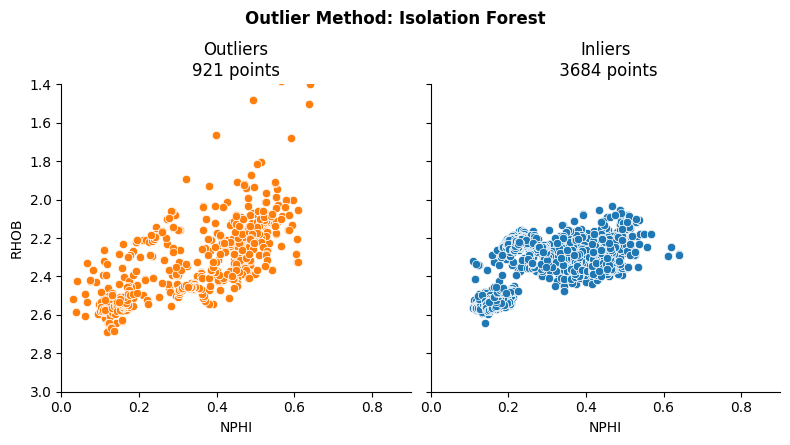

In [25]:
outlier_plot(dataframe_DropNaN, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.9], [3, 1.4])

In [26]:
inliers = dataframe_DropNaN[dataframe_DropNaN['anomaly'] == 1]
inliers

,DEPT,LITHOLOGY_GEOLINK,DCAL,CALI,BS,MUDWEIGHT,DRHO,THOR,NPHI,RHOB,...,GR,URAN,DTC,RDEP,SP,RSHA,RMIC,RMED,anomaly_scores,anomaly
12118,1993.0849,6.0,-0.085496,12.164508,12.250001,1.30,0.020000,3.867000,0.511100,2.272300,...,108.413399,1.930300,123.799126,1.0240,80.931702,1.063374,0.226200,1.071600,0.019431,1
12119,1993.2363,6.0,-0.085496,12.164508,12.250001,1.30,0.008079,3.690367,0.489940,2.268525,...,106.378143,1.918081,123.520790,1.0240,79.862167,0.982091,0.223915,0.984972,0.029670,1
12120,1993.2373,6.0,-0.077315,12.172689,12.250001,1.30,0.008000,3.689200,0.489800,2.268500,...,106.364700,1.918000,123.518951,1.0236,79.855103,0.982000,0.223900,0.984400,0.029670,1
12121,1993.3887,6.0,-0.077315,12.172689,12.250001,1.30,-0.002530,3.789537,0.483343,2.265818,...,104.154694,1.832266,123.405586,1.0236,78.709763,0.971828,0.222012,0.969498,0.028946,1
12122,1993.3897,6.0,-0.061098,12.188906,12.250001,1.30,-0.002600,3.790200,0.483300,2.265800,...,104.140099,1.831700,123.404839,1.0190,78.702194,0.972044,0.222000,0.969400,0.032145,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16662,2339.3369,5.0,-0.032488,8.467512,8.500000,1.26,0.002600,6.285500,0.275900,2.246000,...,81.308998,0.776300,89.025703,0.6995,179.390991,0.745724,0.468000,0.726700,0.021613,1
16663,2339.4883,5.0,-0.032488,8.467512,8.500000,1.26,0.006276,6.962826,0.279278,2.247788,...,80.771057,0.737059,88.425888,0.6995,178.589294,0.979191,0.660330,0.942674,0.013671,1
16664,2339.4893,5.0,-0.025441,8.474559,8.500000,1.26,0.006300,6.967300,0.279300,2.247800,...,80.767502,0.736800,88.421928,0.9442,178.584000,0.981942,0.661600,0.944100,0.011637,1
16665,2339.6407,5.0,-0.025441,8.474559,8.500000,1.26,0.017128,7.564754,0.288340,2.273331,...,89.452835,0.732727,88.671555,0.9442,177.637344,1.406627,1.845878,1.357470,0.006047,1


Data Transformed (Normalized)

In [27]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import yeojohnson

cols = ['RHOB', 'NPHI', 'GR', 'DTC', 'RDEP']
scaler = MinMaxScaler()

inliers[cols] = scaler.fit_transform(inliers[cols])

for column in cols:
    inliers[column], lamda_val = yeojohnson(inliers[column])
inliers

C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_1800\1431083271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inliers[cols] = scaler.fit_transform(inliers[cols])
C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_1800\1431083271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inliers[column], lamda_val = yeojohnson(inliers[column])


,DEPT,LITHOLOGY_GEOLINK,DCAL,CALI,BS,MUDWEIGHT,DRHO,THOR,NPHI,RHOB,...,GR,URAN,DTC,RDEP,SP,RSHA,RMIC,RMED,anomaly_scores,anomaly
12118,1993.0849,6.0,-0.085496,12.164508,12.250001,1.30,0.020000,3.867000,0.698546,0.259733,...,0.628901,1.930300,0.796904,0.161435,80.931702,1.063374,0.226200,1.071600,0.019431,1
12119,1993.2363,6.0,-0.085496,12.164508,12.250001,1.30,0.008079,3.690367,0.664143,0.257016,...,0.608969,1.918081,0.792453,0.161435,79.862167,0.982091,0.223915,0.984972,0.029670,1
12120,1993.2373,6.0,-0.077315,12.172689,12.250001,1.30,0.008000,3.689200,0.663915,0.256998,...,0.608837,1.918000,0.792424,0.161381,79.855103,0.982000,0.223900,0.984400,0.029670,1
12121,1993.3887,6.0,-0.077315,12.172689,12.250001,1.30,-0.002530,3.789537,0.653375,0.255048,...,0.587156,1.832266,0.790610,0.161381,78.709763,0.971828,0.222012,0.969498,0.028946,1
12122,1993.3897,6.0,-0.061098,12.188906,12.250001,1.30,-0.002600,3.790200,0.653305,0.255035,...,0.587012,1.831700,0.790598,0.160756,78.702194,0.972044,0.222000,0.969400,0.032145,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16662,2339.3369,5.0,-0.032488,8.467512,8.500000,1.26,0.002600,6.285500,0.303068,0.240140,...,0.360584,0.776300,0.226427,0.106625,179.390991,0.745724,0.468000,0.726700,0.021613,1
16663,2339.4883,5.0,-0.032488,8.467512,8.500000,1.26,0.006276,6.962826,0.308975,0.241522,...,0.355191,0.737059,0.216291,0.106625,178.589294,0.979191,0.660330,0.942674,0.013671,1
16664,2339.4893,5.0,-0.025441,8.474559,8.500000,1.26,0.006300,6.967300,0.309014,0.241532,...,0.355156,0.736800,0.216224,0.150060,178.584000,0.981942,0.661600,0.944100,0.011637,1
16665,2339.6407,5.0,-0.025441,8.474559,8.500000,1.26,0.017128,7.564754,0.324786,0.260470,...,0.441885,0.732727,0.220444,0.150060,177.637344,1.406627,1.845878,1.357470,0.006047,1


Prediction KNeighborsClassifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [29]:
inliers = inliers.reset_index()
data = inliers[['DEPT', 'RHOB', 'NPHI', 'GR', 'DTC', 'RDEP', 'LITHOLOGY_GEOLINK']]
X = data.iloc[:, 1:6].values
y = data['LITHOLOGY_GEOLINK'].values


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train = data.iloc[:,1:6].values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Y_train = data.iloc[:,-1].values
print(Y_train)

[6. 6. 6. ... 5. 5. 5.]


In [33]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [34]:
X_test = X_train

In [35]:
y_pred = model.predict(X_test)
y_pred

array([6., 6., 6., ..., 5., 5., 5.])

In [36]:
accuracyscore = accuracy_score(Y_train, y_pred)
accuracy = accuracyscore*100
print(f"Akurasi K Neighbors Classifier : {accuracy:.2f}%")
print(classification_report(Y_train, y_pred))

Akurasi K Neighbors Classifier : 94.44%
              precision    recall  f1-score   support

         2.0       0.96      0.98      0.97       531
         5.0       0.95      0.95      0.95      1395
         6.0       0.95      0.93      0.94       856
         7.0       1.00      0.88      0.94        17
        12.0       0.89      0.86      0.87       206
        13.0       0.94      0.97      0.95       653
        16.0       0.84      0.62      0.71        26

    accuracy                           0.94      3684
   macro avg       0.93      0.88      0.90      3684
weighted avg       0.94      0.94      0.94      3684



In [37]:
color_map = {
    1.0: "#ffff00",  # Yellow
    2.0: "#ffffe0",  # LightYellow
    3.0: "#ffd700",  # Gold
    4.0: "#d2b48c",  # Tan
    5.0: "#ffa07a",  # LightSalmon
    6.0: "#daa520",  # DarkYellow
    7.0: "#006400",  # DarkGreen
    8.0: "#008b8b",  # DarkCyan
    9.0: "#6a5acd",  # SlateBlue
    10.0: "#6a5acd",  # SlateBlue
    11.0: "#6a5acd",  # SlateBlue
    12.0: "#1e90ff",  # Dodger Blue
    13.0: "#00bfff",  # DeepSkyBlue
    14.0: "#008b8b",  # DarkCyan
    15.0: "#00ffff",  # Cyan
    16.0: "#00ffff",  # Cyan
    17.0: "#ffffe0",  # Light Yellow
    18.0: "#000000",  # Black
    19.0: "#00ffff",  # Cyan
    20.0: "#ff6347",  # Tomato
    21.0: "#ffc0cb",  # Pink
    22.0: "#ffb6c1",  # Light Magenta
    23.0: "#fa8072",  # Salmon
    24.0: "#ff0000",  # Red
    25.0: "#daa520",  # DarkYellow
    26.0: "#ffffff",  # White
    27.0: "#ffb6c1",  # LightMagenta
    28.0: "#ffa500",  # Orange
    29.0: "#a9a9a9",  # MediumGray
    30.0: "#008b8b",  # Dark Cyan
    31.0: "#40e0d0",  # Turquoise
    32.0: "#ffb6c1",  # LightPink
    33.0: "#ff00ff",  # Magenta
    34.0: "#fff0f5",  # LavenderBlush
    35.0: "#ffffe0",  # LightYellow
    36.0: "#fafad2",  # LightGoldenrod
}


lithology_labels = {
    1.0: 'Sandstone ',
    2.0: 'Silty Sand',
    3.0: 'Cross Bedded Sand',
    4.0: 'Sandy Silt',
    5.0: 'Silt',
    6.0: 'Shaly Silt',
    7.0: 'Silty Shale',
    8.0: 'Shale',
    9.0: 'Chalk',
    10.0: 'Porous Limestone',
    11.0: 'Limestone',
    12.0: 'Argillaceous Limestone',
    13.0: 'Marlstone',
    14.0: 'Calcareous Shale',
    15.0: 'Dolomite',
    16.0: 'Calcareous Cement',
    17.0: 'Conglomerate',
    18.0: 'Coal',
    19.0: 'Cinerite',
    20.0: 'Volcanic Tuff',
    21.0: 'Halite',
    22.0: 'Anhydrite',
    23.0: 'Basement',
    24.0: 'Plutonic Rock',
    25.0: 'Biogenic Ooze',
    26.0: 'Gypsum',
    27.0: 'Sylvinite',
    28.0: 'Volcanic Rock',
    29.0: 'Spiculite',
    30.0: 'Metamorphic Rock',
    31.0: 'Calcareous Debris Flow',
    32.0: 'Polyhalite',
    33.0: 'Carnallite',
    34.0: 'Kaïnite',
    35.0: 'Aeolian Sandstone ',
    36.0: 'Arkose'
}


[6. 6. 6. ... 5. 5. 5.]
['DEPT', 'RHOB', 'NPHI', 'GR', 'DTC', 'RDEP', 'LITHOLOGY_GEOLINK']


C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_1800\4072023108.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=list(range(len(color_map))), aspect=60, pad=0.05, extend='neither')


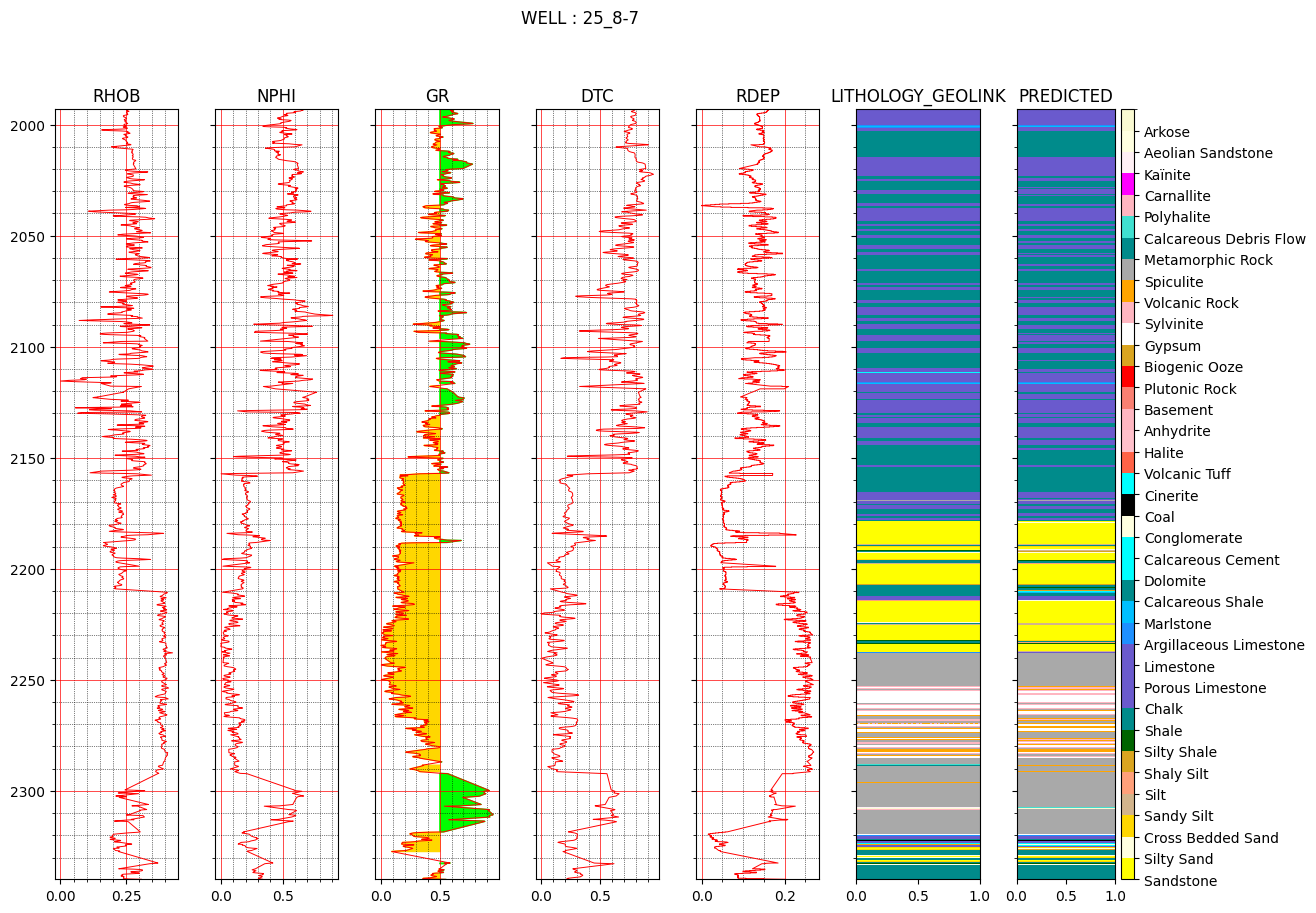

In [38]:
import matplotlib.colors as mcolors
# Visualization
y_pred = model.predict(X_test)
print(y_pred)
mnemonics = list(data.columns)
data = data.values
print(mnemonics)

rows, cols = 1, 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 10), sharey=True)

cmap = mcolors.ListedColormap(list(color_map.values()))
norm = mcolors.BoundaryNorm(list(range(len(color_map) + 1)), cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=list(range(len(color_map))), aspect=60, pad=0.05, extend='neither')
cbar.ax.set_yticklabels(list(color_map.keys()))


for i in range(cols):
    if i < cols - 2:
        ax[i].plot(data[:, i + 1], data[:, 0], 'r', linewidth=0.7)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='red')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
        ax[i].set_title('%s' % mnemonics[i + 1])

    if i == cols - 2:
        F = np.vstack((data[:, -1], data[:, -1])).T
        m = ax[i].imshow(F, aspect='auto', cmap=cmap, extent=[0, 1, max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mnemonics[i + 1])

    elif i == cols - 1:
        F = np.vstack((y_pred, y_pred)).T
        m = ax[i].imshow(F, aspect='auto', cmap=cmap, extent=[0, 1, max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('PREDICTED')

cl = 0.5
y2 = data[:, 3]
below_threshold = y2 < cl
above_threshold = y2 >= cl
ax[2].fill_betweenx(data[:, 0], cl, y2, where=below_threshold, color='gold')
ax[2].fill_betweenx(data[:, 0], cl, y2, where=above_threshold, color='lime')

# Mengatur label pada colorbar
cbar.ax.set_yticklabels([lithology_labels[key] for key in sorted(color_map.keys())])

plt.suptitle('WELL : 25_8-7', fontsize=12)
plt.subplots_adjust(wspace=0.3)
plt.show()